In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=232425 sha256=c6566f64f9a24b546d95ddb9cc67fe7a93007e389d32ffa153033903aa147137
  Stored in directory: /tmp/pip-ephem-wheel-cache-8bh2zi3a/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

##Insert Data
Input Data Into DataFrame and do some changes for missing value code

In [ ]:
# cat_features = ["Sex", "Steroid", "Antivirals","Fatigue","Malaise","Anorexia","Liver_Big", "Liver_Firm", "Spleen_Pal","Spiders", "Ascites", "Varices", "Histology"""]


In [ ]:
na_value = "?"
data = pd.read_csv("hepatitis.data", na_values = na_value)
data.head()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Pal,Spiders,Ascites,Varices,Bilirubin,Alk_Phos,SGOT,Albumin,Protime,Histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


##DATA EXPLORATORY
We need to understand the data in this phase

In [ ]:
profile = ProfileReport(data)
profile

In [ ]:
for i in data.columns:
  print(i, data[i].unique())

Class [2 1]
Age [30 50 78 31 34 51 23 39 32 41 47 38 66 40 22 27 42 25 49 58 61 62 26 35
 37 20 65 52 33 56 28 36 44 64 45 57 24 67 59 60 48 54  7 69 72 70 46 53
 43]
Sex [2 1]
Steroid [ 1.  2. nan]
Antivirals [2 1]
Fatigue [ 2.  1. nan]
Malaise [ 2.  1. nan]
Anorexia [ 2.  1. nan]
Liver_Big [ 1.  2. nan]
Liver_Firm [ 2.  1. nan]
Spleen_Pal [ 2.  1. nan]
Spiders [ 2.  1. nan]
Ascites [ 2.  1. nan]
Varices [ 2. nan  1.]
Bilirubin [1.  0.9 0.7 nan 1.3 2.2 2.  1.2 0.6 0.4 0.8 1.4 2.3 0.5 0.3 4.6 1.8 3.5
 4.1 1.6 2.8 1.5 2.5 3.  4.8 2.4 1.7 1.1 3.2 2.9 8.  3.9 1.9 4.2 7.6]
Alk_Phos [ 85. 135.  96.  46.  nan  95.  78.  59.  81.  57.  72. 102.  62.  53.
  70.  48. 133.  60.  45. 175. 280.  58.  67. 194. 150. 180.  75.  56.
  71.  74.  80. 191. 125. 110.  50.  92.  52.  26. 215. 164. 103.  34.
  68.  82. 127.  76. 100.  55. 167.  30. 179. 141.  44. 165. 118. 230.
 107.  40. 147. 114.  84. 123. 168.  86. 138. 155.  63. 256. 119. 139.
  90. 160. 158. 115. 243. 181. 130. 166. 295. 120.  65. 109.

##Outlier

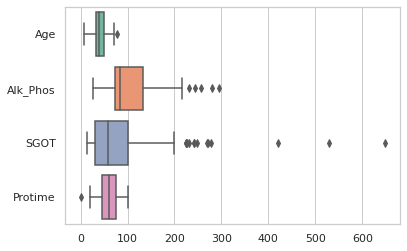

In [ ]:
import seaborn as sns
col = ["Age","Alk_Phos","SGOT","Protime"]
v_data = {}
for i in col:
  v_data[i] = data[i]
v_data = pd.DataFrame(v_data)
sns.set_theme(style="whitegrid")
# h = sns.load_dataset(data)
ax = sns.boxplot(data=v_data, orient="h", palette="Set2")

##Preprocessing Data

The value of the data needs to be processed further to facilitate the modeling process

In [ ]:
cat_features = ["Class", "Steroid", "Antivirals","Fatigue","Malaise","Anorexia","Liver_Big", "Liver_Firm", "Spleen_Pal","Spiders", "Ascites", "Varices", "Histology"]


In [ ]:
#Changing Value sex into Female and Male for Process Encoding
sex_val = {2: "Female", 1 : "Male"}
data["Sex"] = data["Sex"].map(sex_val)
#Changing another boolean value into 1-0 value for more understandable 
val = {2: 1, 1: 0}
for i in cat_features:
  data[i] = data[i].map(val)

In [ ]:
#Grouping ages for modeling improvement purpose
data['Age']  = np.where((data['Age'] <18) ,'Teenager',
                               np.where((data['Age'] >=18) & (data['Age'] <=25),'Young',
                                np.where((data['Age'] >=25) & (data['Age'] <=40),'Adult',
                               'Old')))

In [ ]:
data

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Pal,Spiders,Ascites,Varices,Bilirubin,Alk_Phos,SGOT,Albumin,Protime,Histology
0,1,Adult,Female,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,NaN,0
1,1,Old,Male,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,NaN,0
2,1,Old,Male,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,NaN,0
3,1,Adult,Male,NaN,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,1,Adult,Male,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,200.0,4.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,Old,Male,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,NaN,242.0,3.3,50.0,1
151,1,Old,Male,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,NaN,1
152,1,Old,Male,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,NaN,1
153,1,Old,Female,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1


###Missing Value Handling
There is 2 method for handling missing value. First, we can make new category to fill the missing value if the frequency is high enough. Second, we can fill the missing value with the most frequency value on each features

In [ ]:
extracted_data ={}
# Make new category because to much number of missing value on Protime feature 
data.Protime = data.Protime.fillna(61) 
data

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Pal,Spiders,Ascites,Varices,Bilirubin,Alk_Phos,SGOT,Albumin,Protime,Histology
0,1,Adult,Female,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,61.0,0
1,1,Old,Male,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,61.0,0
2,1,Old,Male,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,61.0,0
3,1,Adult,Male,NaN,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,1,Adult,Male,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,200.0,4.0,61.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,Old,Male,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,NaN,242.0,3.3,50.0,1
151,1,Old,Male,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,61.0,1
152,1,Old,Male,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,61.0,1
153,1,Old,Female,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1


In [ ]:
from sklearn.impute import SimpleImputer
# Fill the missing value with most frequent value
imp_mode = SimpleImputer(strategy="most_frequent")
data[:] = imp_mode.fit_transform(data)
data

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Pal,Spiders,Ascites,Varices,Bilirubin,Alk_Phos,SGOT,Albumin,Protime,Histology
0,1,Adult,Female,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,61.0,0
1,1,Old,Male,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,61.0,0
2,1,Old,Male,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,61.0,0
3,1,Adult,Male,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,1,Adult,Male,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,200.0,4.0,61.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,Old,Male,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,85.0,242.0,3.3,50.0,1
151,1,Old,Male,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,61.0,1
152,1,Old,Male,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,61.0,1
153,1,Old,Female,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1


In [ ]:
#Checking if there is another missing value
data.isnull().values.any()

False

##ENCODING 
This process use to make data easier on modeling by changing categorical column into numeric.

In [ ]:
# cat_features = ["Age","Sex", "Steroid", "Antivirals","Fatigue","Malaise","Anorexia","Liver_Big", "Liver_Firm", "Spleen_Pal","Spiders", "Ascites", "Varices", "Histology"]

In [ ]:
#Insert all feature that need to encode
cat_features = ["Age","Sex"]

In [ ]:
#With OHE by sklearn for Encoding process 
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
transformed_train = ohe.fit_transform(data[cat_features])

ohe_train = pd.DataFrame(transformed_train, columns=ohe.get_feature_names(), index=data.index)

data = pd.concat([data, ohe_train], axis=1).drop(cat_features, axis=1)

In [ ]:
data

,Class,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Pal,Spiders,Ascites,Varices,Bilirubin,Alk_Phos,SGOT,Albumin,Protime,Histology,x0_Adult,x0_Old,x0_Teenager,x0_Young,x1_Female,x1_Male
0,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,61.0,0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,61.0,0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,61.0,0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,200.0,4.0,61.0,0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,85.0,242.0,3.3,50.0,1,0.0,1.0,0.0,0.0,0.0,1.0
151,1,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,61.0,1,0.0,1.0,0.0,0.0,0.0,1.0
152,1,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,61.0,1,0.0,1.0,0.0,0.0,0.0,1.0
153,1,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
#Normalization 
col = ["Bilirubin", "SGOT", "Alk_Phos"]
for i in col:
  data[i]  = (data[i] - data[i].min()) / (data[i].max() - data[i].min())
  data[i]=data[i].round(2)

In [ ]:
data

,Class,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Pal,Spiders,Ascites,Varices,Bilirubin,Alk_Phos,SGOT,Albumin,Protime,Histology,x0_Adult,x0_Old,x0_Teenager,x0_Young,x1_Female,x1_Male
0,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.09,0.22,0.01,4.0,61.0,0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.08,0.41,0.04,3.5,61.0,0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.05,0.26,0.03,4.0,61.0,0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.05,0.07,0.06,4.0,80.0,0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.09,0.22,0.29,4.0,61.0,0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.95,0.22,0.36,3.3,50.0,1,0.0,1.0,0.0,0.0,0.0,1.0
151,1,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.08,0.37,0.20,4.3,61.0,1,0.0,1.0,0.0,0.0,0.0,1.0
152,1,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.06,0.18,0.01,4.1,61.0,1,0.0,1.0,0.0,0.0,0.0,1.0
153,1,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.16,0.20,0.01,4.1,48.0,1,0.0,1.0,0.0,0.0,1.0,0.0


##MODELING
In this section we try 5 model to find the best result.

In [ ]:
#Split data into train and test 
train, test = train_test_split(data, test_size = 0.2, random_state=42 )

In [ ]:
y_train_hepatitis = train["Class"]
X_train_hepatitis = train.drop(columns=["Class"], axis=1)

y_test_hepatitis = test["Class"]
X_test_hepatitis = test.drop(columns=["Class"], axis=1)
X_train_hepatitis.head()

,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Pal,Spiders,Ascites,Varices,Bilirubin,Alk_Phos,SGOT,Albumin,Protime,Histology,x0_Adult,x0_Old,x0_Teenager,x0_Young,x1_Female,x1_Male
96,0.0,1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.06,0.45,0.18,3.9,100.0,1,1.0,0.0,0.0,0.0,0.0,1.0
122,1.0,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.16,0.22,0.04,4.0,61.0,1,0.0,1.0,0.0,0.0,0.0,1.0
82,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.05,0.28,0.03,4.0,100.0,0,1.0,0.0,0.0,0.0,0.0,1.0
109,0.0,1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.05,0.14,0.10,3.0,31.0,1,1.0,0.0,0.0,0.0,0.0,1.0
65,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.06,0.22,0.04,4.2,61.0,0,1.0,0.0,0.0,0.0,0.0,1.0


###Support Vector Machine

In [ ]:
svm = SVC()
svm.fit(X_train_hepatitis, y_train_hepatitis)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svm_hepatitis = svm.predict(X_test_hepatitis)
print(classification_report(y_test_hepatitis, y_pred_svm_hepatitis))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.77      1.00      0.87        24

    accuracy                           0.77        31
   macro avg       0.39      0.50      0.44        31
weighted avg       0.60      0.77      0.68        31



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


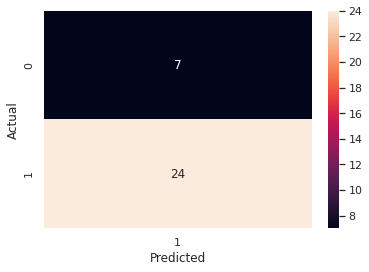

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
data = {}
data["y_Actual"] = y_test_hepatitis
data["y_Predicted"] = y_pred_svm_hepatitis

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

###Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_hepatitis, y_train_hepatitis)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rf_hepatitis = rf.predict(X_test_hepatitis)
print(classification_report(y_test_hepatitis, y_pred_rf_hepatitis))

              precision    recall  f1-score   support

           0       0.20      0.14      0.17         7
           1       0.77      0.83      0.80        24

    accuracy                           0.68        31
   macro avg       0.48      0.49      0.48        31
weighted avg       0.64      0.68      0.66        31



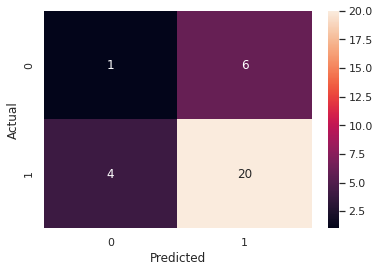

In [ ]:

data = {}
data["y_Actual"] = y_test_hepatitis
data["y_Predicted"] = y_pred_rf_hepatitis

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

###Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_hepatitis, y_train_hepatitis)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb_hepatitis = nb.predict(X_test_hepatitis)
print(classification_report(y_test_hepatitis, y_pred_nb_hepatitis))

              precision    recall  f1-score   support

           0       0.27      1.00      0.42         7
           1       1.00      0.21      0.34        24

    accuracy                           0.39        31
   macro avg       0.63      0.60      0.38        31
weighted avg       0.83      0.39      0.36        31



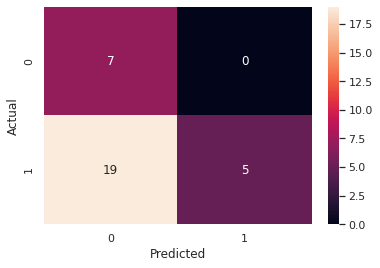

In [ ]:
data = {}
data["y_Actual"] = y_test_hepatitis
data["y_Predicted"] = y_pred_nb_hepatitis

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(X_train_hepatitis, y_train_hepatitis)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_kNN_hepatitis = kNN.predict(X_test_hepatitis)
print(classification_report(y_test_hepatitis, y_pred_kNN_hepatitis))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.92      0.96      0.94        24

    accuracy                           0.90        31
   macro avg       0.88      0.84      0.85        31
weighted avg       0.90      0.90      0.90        31



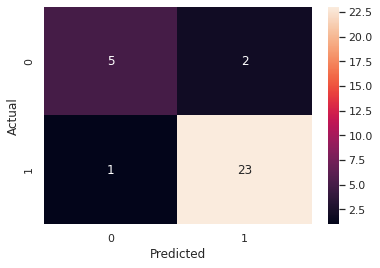

In [ ]:
data = {}
data["y_Actual"] = y_test_hepatitis
data["y_Predicted"] = y_pred_kNN_hepatitis

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

###Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier()
dc.fit(X_train_hepatitis, y_train_hepatitis)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier(constant=None, random_state=None, strategy='warn')

In [ ]:
y_pred_dc_hepatitis = dc.predict(X_test_hepatitis)
print(classification_report(y_test_hepatitis, y_pred_dc_hepatitis))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.77      0.96      0.85        24

    accuracy                           0.74        31
   macro avg       0.38      0.48      0.43        31
weighted avg       0.59      0.74      0.66        31



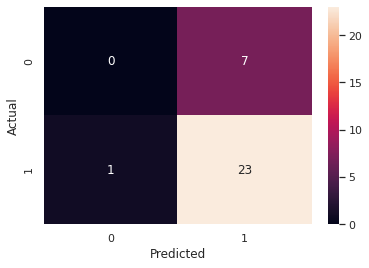

In [ ]:
data = {}
data["y_Actual"] = y_test_hepatitis
data["y_Predicted"] = y_pred_dc_hepatitis

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

###Result

From the 5 model that have been used KNN is the best model with the accuracy score 0.9  